# **Random Forest** ( Diabetes Dataset )

Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75        99
           1       0.57      0.80      0.67        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.71      0.72       154



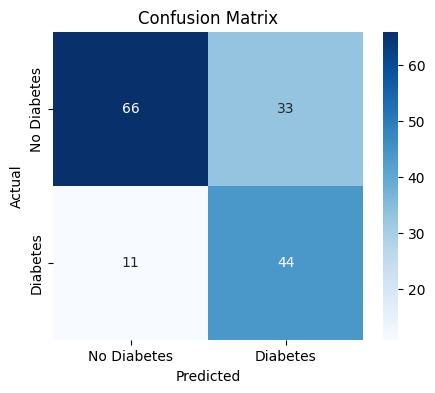

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("/content/diabetes.csv")

# Replace zero values in specific columns with their median
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())

# Split into features (X) and target variable (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Make Predictions
y_pred = clf.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
